-0.02539626795351515 0.023183433101326405


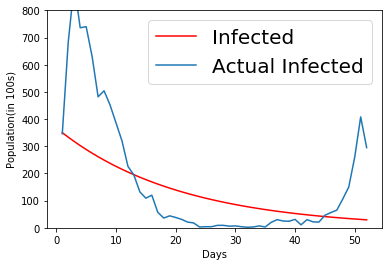

In [8]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit 
from scipy.optimize import minimize
from scipy.integrate import odeint
import numpy as np 
import pandas as pd

#read in Flu dataset
Flu_Data = pd.read_csv ("JPA_Flu_data.csv")
Flu_Data = np.array(Flu_Data)
t = Flu_Data[:,0]

#total population 
N = 126500000
#Initial number of infected: 
I0 = 350
#Number of initial recovered: 
R0 = 0
#The number of susceptible: 
S0 = N - I0 - R0

Flu_DataDev= Flu_Data[:,1]

#Makes a squared error eqation 
def sumsq(p):
    beta, gamma = p
    def SIR (y, t, N, beta, gamma):
        S, I, R = y
        dSdt = (-beta * S * I)/N
        dIdt = (beta * S * I)/N - gamma * I
        dRdt = (gamma*I)/N
        return dSdt, dIdt, dRdt
    Y0 = S0, I0, R0
    sol = odeint(SIR, Y0, t, args = (N, beta, gamma), full_output=0)
    S, I, R = sol.T
    return(sum((I - (Flu_DataDev))**2))

# #Minimizes the squared error 
# msol = minimize(sumsq,(.001,.001),method='Nelder-Mead')
# msol.x

optimmal = minimize()

 optimal = minimize(
            loss,
            [0.001, 0.001],
            args=(data),
            method='L-BFGS-B',
            bounds=[(0.00000001, 0.4), (0.00000001, 0.4)]
        )
        beta, gamma = optimal.x


#Breaks the array up and assigns back to beta and gamma
beta, gamma = msol.x


#SIR equation 
def SIR (y, t, N, beta, gamma):
    S, I, R = y
    dSdt = (-beta * S * I)/N
    dIdt = (beta * S * I)/N - gamma * I
    dRdt = (gamma*I)/N 
    return dSdt, dIdt, dRdt

#Initial condition vector: 
Y0 = S0, I0, R0
print (beta, gamma)


#Solves the Eqation
sol = odeint(SIR, Y0, t, args = (N, beta, gamma))
S, I, R = sol.T
#print (sol.T)

#Graphs the eqation
#plt.plot (t, S, c= "b", label = 'Susceptible')
plt.plot (t, I, c="r", label = 'Infected')
#plt.plot (t, R, c="g",label = 'Recovered')
plt.plot (t, Flu_Data[:,1], label = "Actual Infected")

plt.ylabel("Population(in 100s)") 
plt.xlabel ('Days')
plt.legend(prop={"size":20})
plt.ylim (0, 800)
plt.show()  


